Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class:              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm       class:  
0                0.2  Iris-setosa  
1                0.2 

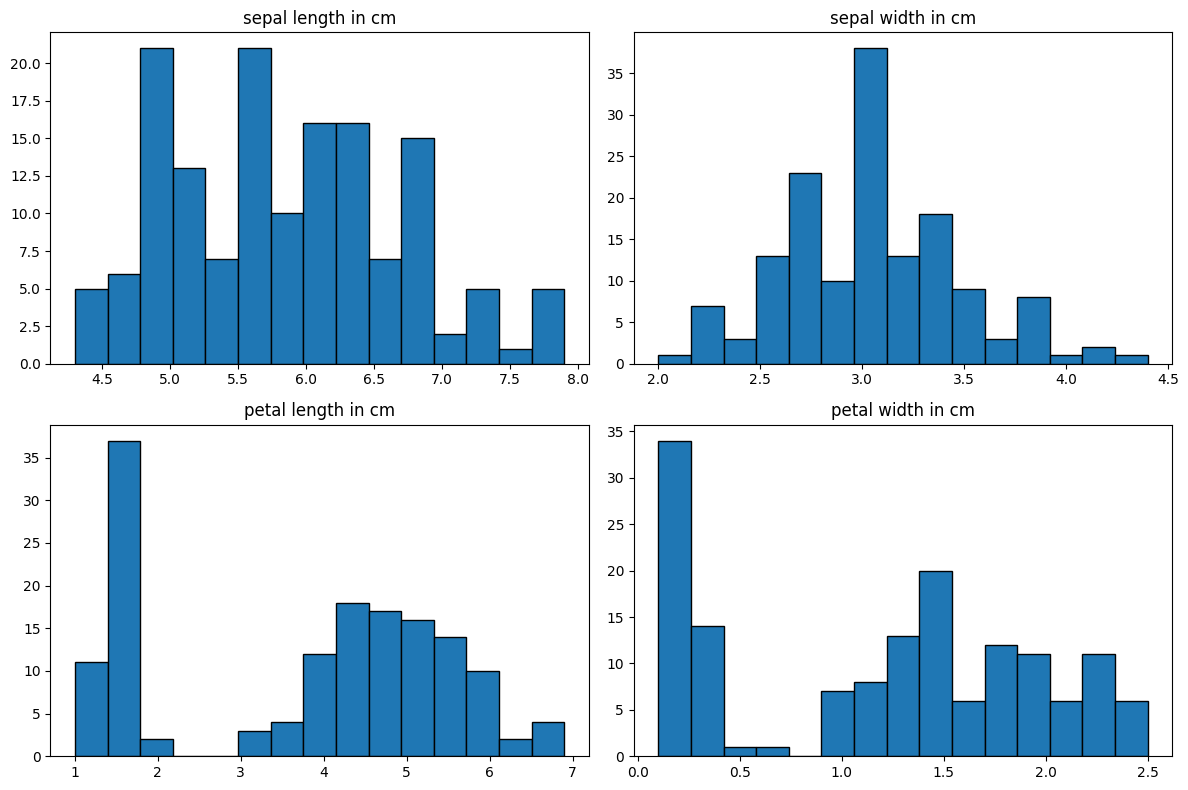


Creating Correlation Matrix Heatmap...


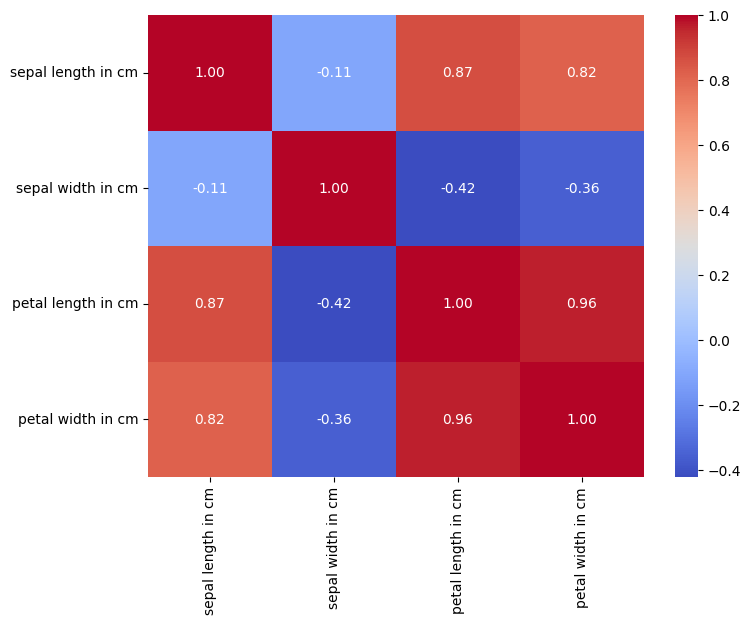


Creating Pairplot...


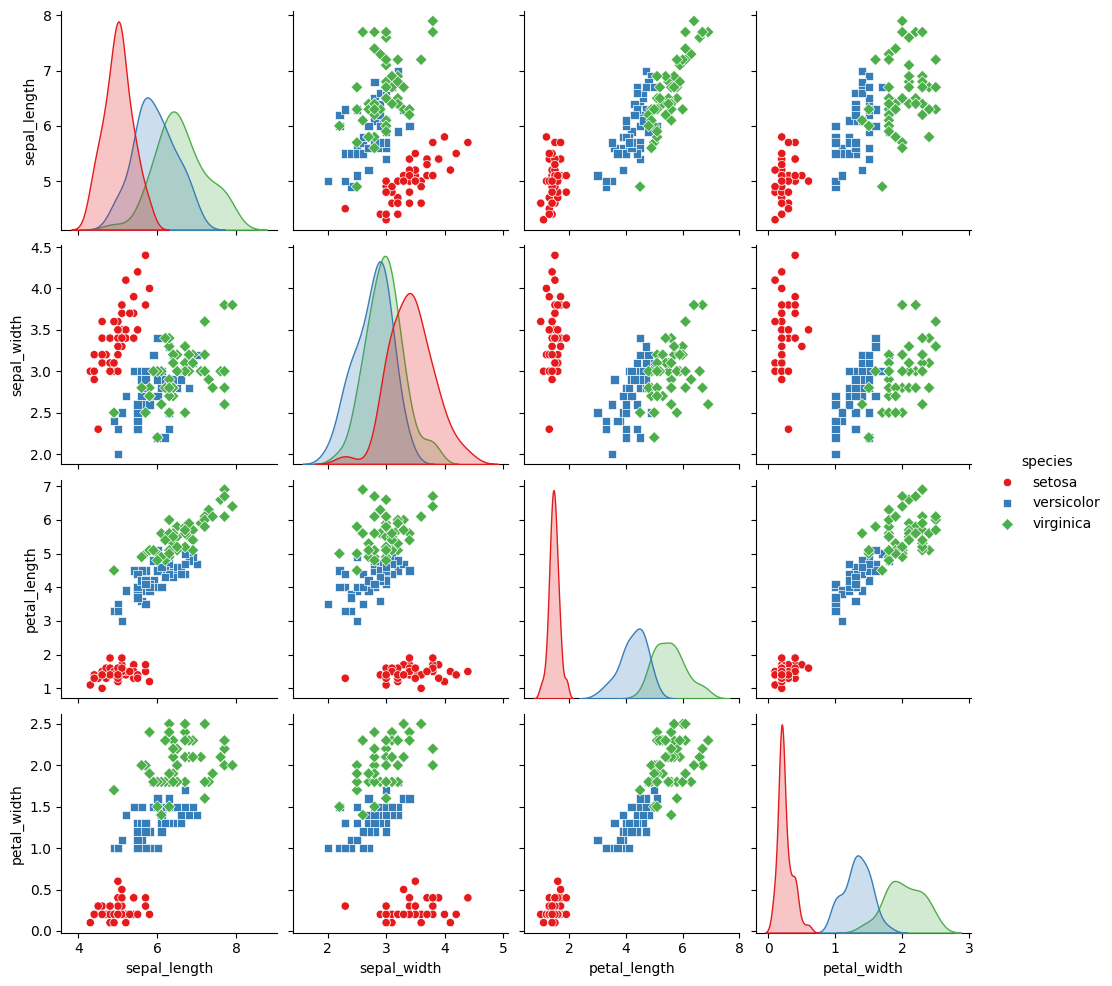

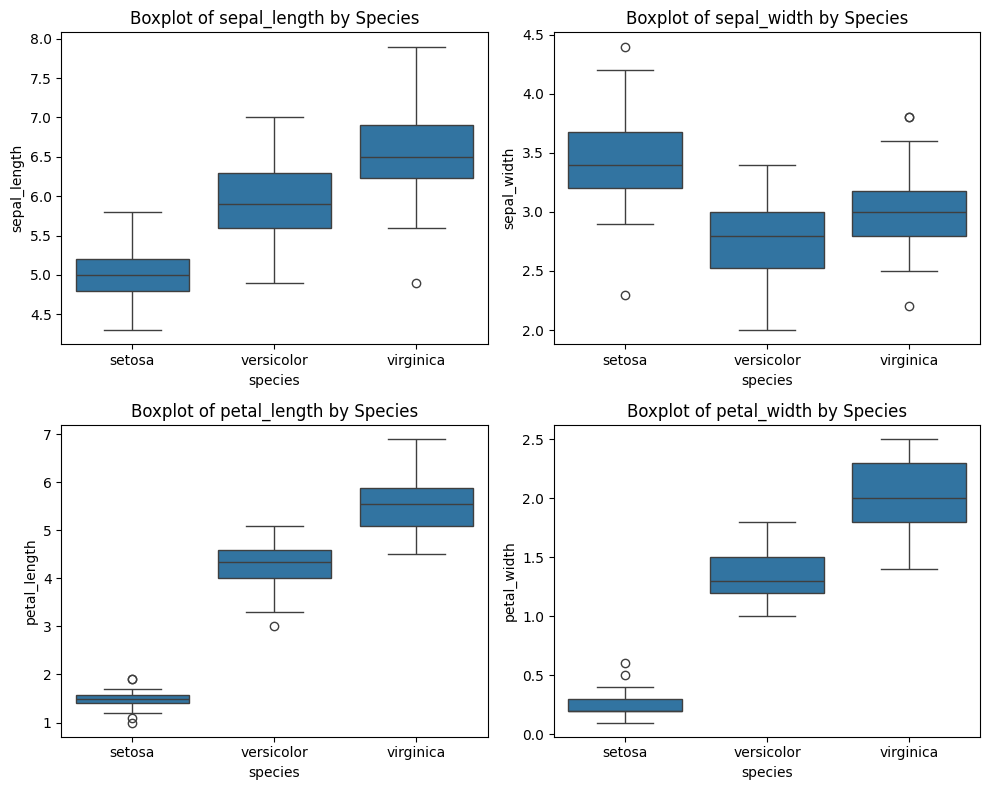


Mean, Median, Mode, Variance, and Std Deviation for each feature:

Feature: sepal_length
Mean: 5.843333333333334
Median: 5.8
Mode: 5.0
Variance: 0.6856935123042507
Standard Deviation: 0.828066127977863

Feature: sepal_width
Mean: 3.0573333333333337
Median: 3.0
Mode: 3.0
Variance: 0.189979418344519
Standard Deviation: 0.4358662849366982

Feature: petal_length
Mean: 3.7580000000000005
Median: 4.35
Mode: 1.4
Variance: 3.116277852348993
Standard Deviation: 1.7652982332594662

Feature: petal_width
Mean: 1.1993333333333336
Median: 1.3
Mode: 0.2
Variance: 0.5810062639821029
Standard Deviation: 0.7622376689603465

Performing T-tests for each feature between species groups...

T-test results for sepal_length:
setosa vs versicolor: t-stat = -10.52, p-value = 8.99e-18
setosa vs virginica: t-stat = -15.39, p-value = 6.89e-28
versicolor vs virginica: t-stat = -5.63, p-value = 1.72e-07

T-test results for sepal_width:
setosa vs versicolor: t-stat = 9.45, p-value = 1.85e-15
setosa vs virginica: t-st

In [29]:
# IMPORTING ALL THE NECESSARY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Load the dataset
# TO READ THE DATASE
df=pd.read_csv("iris.csv")
df

# 1. Dataset Overview
print("Dataset Overview:")
print(df.info())
print(df.head())

# 2. Data Cleaning and Preprocessing
print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Classes in the Target Variable (Species):")
print(df['class:'].unique())

# 3. Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Distribution of target variable
print("\nDistribution of Target Variable (Species):")
print(df['class:'].value_counts())

# Histograms for each numerical feature
print("\nCreating Histograms...")
df.hist(bins=15, figsize=(12, 8), grid=False, edgecolor='black')
plt.tight_layout()
plt.show()

# 4. Correlation matrix and heatmap
print("\nCreating Correlation Matrix Heatmap...")
# correlation_matrix = df.corr()

# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()


# Drop non-numeric columns (if any)
df_numeric = df.select_dtypes(include=[float, int])

# Now compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap as usual
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



# 5. Pairplot to visualize relationships
print("\nCreating Pairplot...")
# sns.pairplot(iris_df, hue='class:', markers=["o", "s", "D"], palette="Set1")
# plt.show()


# Load Iris dataset from seaborn
iris_df = sns.load_dataset('iris')

# Create a pairplot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette="Set1")
plt.show()

# 6. Boxplots grouped by species
# print("\nCreating Boxplots for each feature grouped by species...")
# features = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', ' petal width in cm']

# plt.figure(figsize=(14, 10))
# for i, feature in enumerate(features):
#     plt.subplot(2, 2, i + 1)
#     sns.boxplot(x='class:', y=feature, data=iris_df)
#     plt.title(f'Boxplot of {feature} by Species')
# plt.tight_layout()
# plt.show()



# Load Iris dataset
iris_df = sns.load_dataset('iris')

# List of features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create subplots for each feature
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df)  # Corrected the x='species'
    plt.title(f'Boxplot of {feature} by Species')
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


# 7. Statistical Analysis (Mean, Median, Mode, Variance, Std Dev)
print("\nMean, Median, Mode, Variance, and Std Deviation for each feature:")
for feature in features:
    print(f"\nFeature: {feature}")
    print(f"Mean: {iris_df[feature].mean()}")
    print(f"Median: {iris_df[feature].median()}")
    print(f"Mode: {iris_df[feature].mode()[0]}")
    print(f"Variance: {iris_df[feature].var()}")
    print(f"Standard Deviation: {iris_df[feature].std()}")

# 8. Hypothesis Testing (t-tests)
print("\nPerforming T-tests for each feature between species groups...")
species = iris_df['species'].unique()

for feature in features:
    group1 = iris_df[iris_df['species'] == species[0]][feature]
    group2 = iris_df[iris_df['species'] == species[1]][feature]
    group3 = iris_df[iris_df['species'] == species[2]][feature]
    
    t_stat_1_2, p_val_1_2 = stats.ttest_ind(group1, group2)
    t_stat_1_3, p_val_1_3 = stats.ttest_ind(group1, group3)
    t_stat_2_3, p_val_2_3 = stats.ttest_ind(group2, group3)
    
    print(f"\nT-test results for {feature}:")
    print(f"{species[0]} vs {species[1]}: t-stat = {t_stat_1_2:.2f}, p-value = {p_val_1_2:.2e}")
    print(f"{species[0]} vs {species[2]}: t-stat = {t_stat_1_3:.2f}, p-value = {p_val_1_3:.2e}")
    print(f"{species[1]} vs {species[2]}: t-stat = {t_stat_2_3:.2f}, p-value = {p_val_2_3:.2e}")


# StandardScaler
from sklearn.preprocessing import StandardScaler

# List of the actual column names in your DataFrame
features = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the feature columns
scaled_features = scaler.fit_transform(df[features])

# Create a new DataFrame to store the scaled features (optional)
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Display the first 5 rows of the scaled features
print(scaled_df.head())


# 9. Data Normalization using Standard Scaler
from sklearn.preprocessing import StandardScaler
import pandas as pd

# List of feature columns to normalize
features = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the feature columns
scaled_features = scaler.fit_transform(df[features])

# Convert the scaled features back into a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Add the 'class:' column (the target/label) back to the DataFrame
scaled_df['class:'] = df['class:']

# Display the first 5 rows of the scaled DataFrame
print(scaled_df.head())


